# Úkol: Predikce počtu přepravených osob v letecké dopravě

# Data

Soubor dat poskytuje přehled o počtu osob, které v daném měsíci cestovaly s americkými leteckými společnostmi. 

Obsahuje záznamy za 142 měsíců. Obsahuje 2 sloupce "Month" a "Passengers". 

Vašim úkol je vytvořit různé modely predikce počtu pasažerů
- Jednoduchý RNN
- LTSM
- GRU

U každého modelu porovnejte předvídané a skutečné hodnoty.

Porovnejte modely a vyberte ten nejlepší.

Exprerimentujte s délkou učební sekvence.

# 1. Načtení dat a zobrazení dat

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("..\\dataset\\airline-passengers.csv", index_col="Month", parse_dates=["Month"])


In [3]:
dataset.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
dataset.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


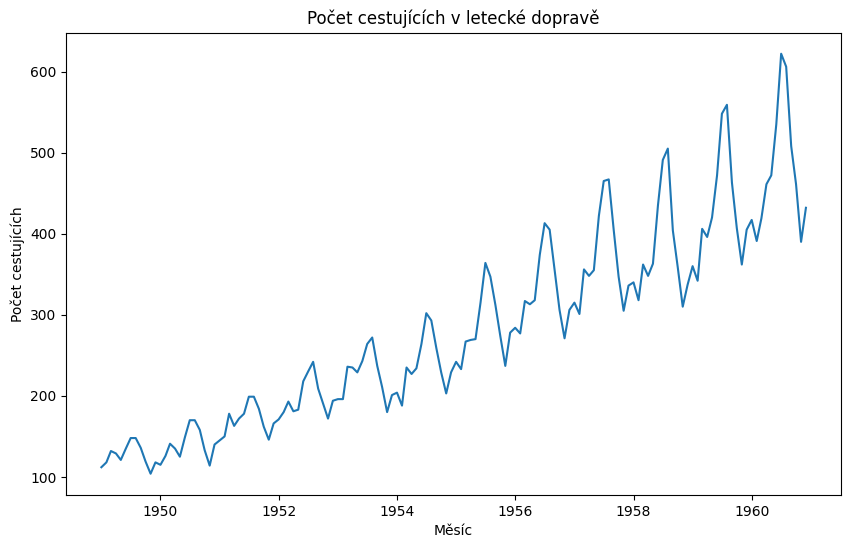

In [6]:
dataset.isna().sum()

# Zobrazení grafu
plt.figure(figsize=(10,6))
plt.plot(dataset)
plt.title("Počet cestujících v letecké dopravě")
plt.xlabel("Měsíc")
plt.ylabel("Počet cestujících")
plt.show()

In [19]:
# Rozdělení dat na 75% trénovacích a 25% testovacích
train_size = int(len(dataset) * 0.75)
test_size = len(dataset) - train_size

In [8]:
train=dataset[:train_size]
test=dataset[train_size:]

Text(0.5, 1.0, 'Počet cestujících')

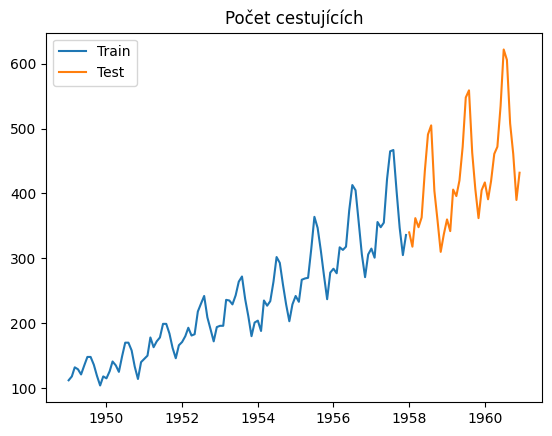

In [9]:
plt.plot(train)
plt.plot(test)
plt.legend([f"Train", "Test"])
plt.title("Počet cestujících")

# 2. Příprava dat

In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Data standardizujte pomocí MinMaxScaler

Z data udělejte sekvence například o délce 10

In [11]:
# Rozdělení na sekvence
n_steps = 10
features = 1

# 3. Jednoduchá RNN

In [12]:
import keras
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

Vykreslete i průběh učení

In [13]:
# Model RNN
model_rnn = Sequential()
model_rnn.add(SimpleRNN(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model_rnn.add(Dense(1))
model_rnn.compile(optimizer='adam', loss='mean_squared_error')

# Trénování modelu
history_rnn = model_rnn.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Vizualizace průběhu učení
plt.plot(history_rnn.history['loss'], label='Trénování')
plt.plot(history_rnn.history['val_loss'], label='Test')
plt.title('Průběh učení RNN')
plt.xlabel('Epochy')
plt.ylabel('Ztráta')
plt.legend()
plt.show()

# Predikce a zobrazení výsledků
predicted_rnn = model_rnn.predict(X_test)
predicted_rnn = scaler.inverse_transform(predicted_rnn)

# Skutečné hodnoty
real_rnn = scaler.inverse_transform(y_test)

# Výpočet RMSE
from sklearn.metrics import mean_squared_error
rmse_rnn = np.sqrt(mean_squared_error(real_rnn, predicted_rnn))
print(f'RMSE pro model RNN: {rmse_rnn}')

NameError: name 'X_train' is not defined

## 3.1 Ověření modelu

V grafu vykreslete skutečné a predikované hodnoty

Vypočítejte RMSE mezi predikovanými a skutečnými hodnotami.

# 4. Neuronová síť LTSM

In [14]:
from keras.layers import Dense, LSTM, Dropout
from keras.optimizers import SGD

## 4.1 Ověření modelu LTSM

In [15]:
# Model LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Trénování modelu
history_lstm = model_lstm.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Vizualizace průběhu učení
plt.plot(history_lstm.history['loss'], label='Trénování')
plt.plot(history_lstm.history['val_loss'], label='Test')
plt.title('Průběh učení LSTM')
plt.xlabel('Epochy')
plt.ylabel('Ztráta')
plt.legend()
plt.show()

# Predikce a zobrazení výsledků
predicted_lstm = model_lstm.predict(X_test)
predicted_lstm = scaler.inverse_transform(predicted_lstm)

# Skutečné hodnoty
real_lstm = scaler.inverse_transform(y_test)

# Výpočet RMSE
rmse_lstm = np.sqrt(mean_squared_error(real_lstm, predicted_lstm))
print(f'RMSE pro model LSTM: {rmse_lstm}')

NameError: name 'X_train' is not defined

# 5. Model GRU

In [16]:
from keras.layers import GRU

## 5.1 Ověření modelu

In [17]:
# Model GRU
model_gru = Sequential()
model_gru.add(GRU(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model_gru.add(Dense(1))
model_gru.compile(optimizer='adam', loss='mean_squared_error')

# Trénování modelu
history_gru = model_gru.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Vizualizace průběhu učení
plt.plot(history_gru.history['loss'], label='Trénování')
plt.plot(history_gru.history['val_loss'], label='Test')
plt.title('Průběh učení GRU')
plt.xlabel('Epochy')
plt.ylabel('Ztráta')
plt.legend()
plt.show()

# Predikce a zobrazení výsledků
predicted_gru = model_gru.predict(X_test)
predicted_gru = scaler.inverse_transform(predicted_gru)

# Skutečné hodnoty
real_gru = scaler.inverse_transform(y_test)

# Výpočet RMSE
rmse_gru = np.sqrt(mean_squared_error(real_gru, predicted_gru))
print(f'RMSE pro model GRU: {rmse_gru}')

NameError: name 'X_train' is not defined